In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

#Load the data set

In [10]:
data = pd.read_csv("bank_full.csv")

In [11]:
data.head(30)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [13]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [14]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# dropping the contact,poutcomec columns as it is not required

In [16]:
data.drop(['contact','poutcome'],inplace=True,axis=1)

levels of categorical features into numeric values

In [17]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['age'] = encoder.fit_transform(data['age'])
data['marital']=encoder.fit_transform(data['marital'])
data['job'] = encoder.fit_transform(data['job'])
data['education'] = encoder.fit_transform(data['education'])
data['default'] = encoder.fit_transform(data['default'])
data['housing'] = encoder.fit_transform(data['housing'])
data['loan'] = encoder.fit_transform(data['loan'])
data['month'] = encoder.fit_transform(data['month'])
data['y'] = encoder.fit_transform(data['y'])
                                    

In [18]:
data.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,40,4,1,2,0,2143,1,0,5,8,261,1,-1,0,0
1,26,9,2,1,0,29,1,0,5,8,151,1,-1,0,0
2,15,2,1,1,0,2,1,1,5,8,76,1,-1,0,0
3,29,1,1,3,0,1506,1,0,5,8,92,1,-1,0,0
4,15,11,2,3,0,1,0,0,5,8,198,1,-1,0,0


# Dividing our data into input and output variables 

In [20]:
X=data.iloc[:,:14]
y=data.iloc[:,14]

#Logistic regression and fit the model

In [22]:
classifier = LogisticRegression()
classifier.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#Predict for X dataset

In [23]:
y_predict = classifier.predict(X)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
Y_pred_df=pd.DataFrame({'y_ac':y,'y_predict':y_predict})

In [25]:
Y_pred_df

,y_ac,y_predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


# Confusion Matrix for the model accuracy

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y,classifier.predict(X))

array([[39138,   784],
       [ 4408,   881]])

#Classification report

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y,classifier.predict(X)))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.53      0.17      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.71      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



# ROC Curve

In [30]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [35]:
fpr, tpr, thresholds=roc_curve(y,classifier.predict_proba(X)[:,1])
AOC=roc_auc_score(y,classifier.predict(X))

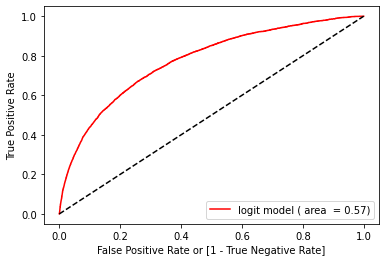

In [36]:

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%AOC)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")